In [19]:
import pandas as pd
import sklearn.decomposition
import numpy as np
from matplotlib import pyplot as plt

## Load labels and set colnames

In [25]:
colnames = ["Tweet ID", "User ID", "Bullying_Traces?", "Type", "Form", "Teasing?", "Author_Role", "Emotion"]
labels = pd.read_csv("./data/data.csv",header=None)
labels.columns = colnames


In [8]:
vocab = open("./data/vocabulary","r")
vocab_size = len(vocab.readlines())
print(f"Vocab size: {vocab_size}")

Vocab size: 4413


In [9]:
labels["Tweet ID"].count()

7321

In [11]:
file = open("./data/featureVector","r")
idx=0
f = []
for features in file.readlines():
    feature_row=np.zeros(vocab_size)
    features=features.rstrip('\n').strip()
    for feature in features.split(" "):
        f_id_val = feature.strip().split(":")
        if(len(f_id_val)==1):
            continue
        feature_idx, value = f_id_val
        feature_row[int(feature_idx)-1] = float(value)
    f.append(feature_row)

feature_df =pd.DataFrame(f,columns=[i for i in range(1,vocab_size+1)])

In [12]:
pca = sklearn.decomposition.PCA(3)
reduced = pca.fit_transform(feature_df)

In [13]:
reduced_df = pd.DataFrame(reduced)

In [26]:
lab_is_bully = pd.DataFrame(labels["Bullying_Traces?"])
lab_is_bully
result = pd.concat([reduced_df,lab_is_bully],axis=1)


29284

In [15]:
result.columns=['x','y','z','bully']

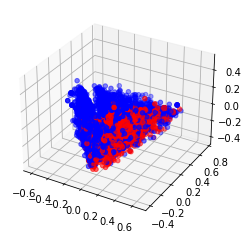

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(result['x'],result['y'],result['z'],c=['r' if b=='y' else 'b' for b in result['bully']])